# LAB 2


#### Q1. 1. Preprocessing (splitting) & Visualisation

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
energy_data = pd.read_csv('./energy.csv')



<AxesSubplot: >

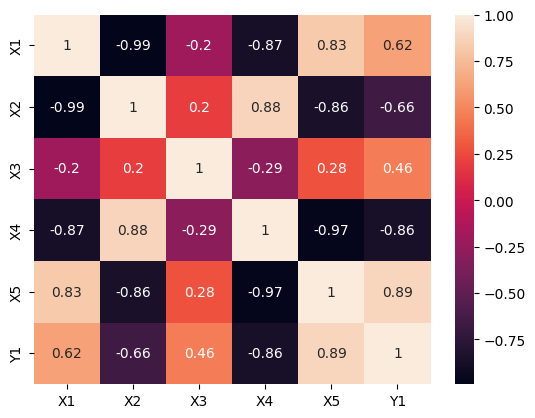

In [35]:
import seaborn as sns
energy_data= energy_data.drop(columns=["X6", "X7", "X8"], axis=1)
corr_mat = energy_data.corr()
sns.heatmap(corr_mat, annot=True)



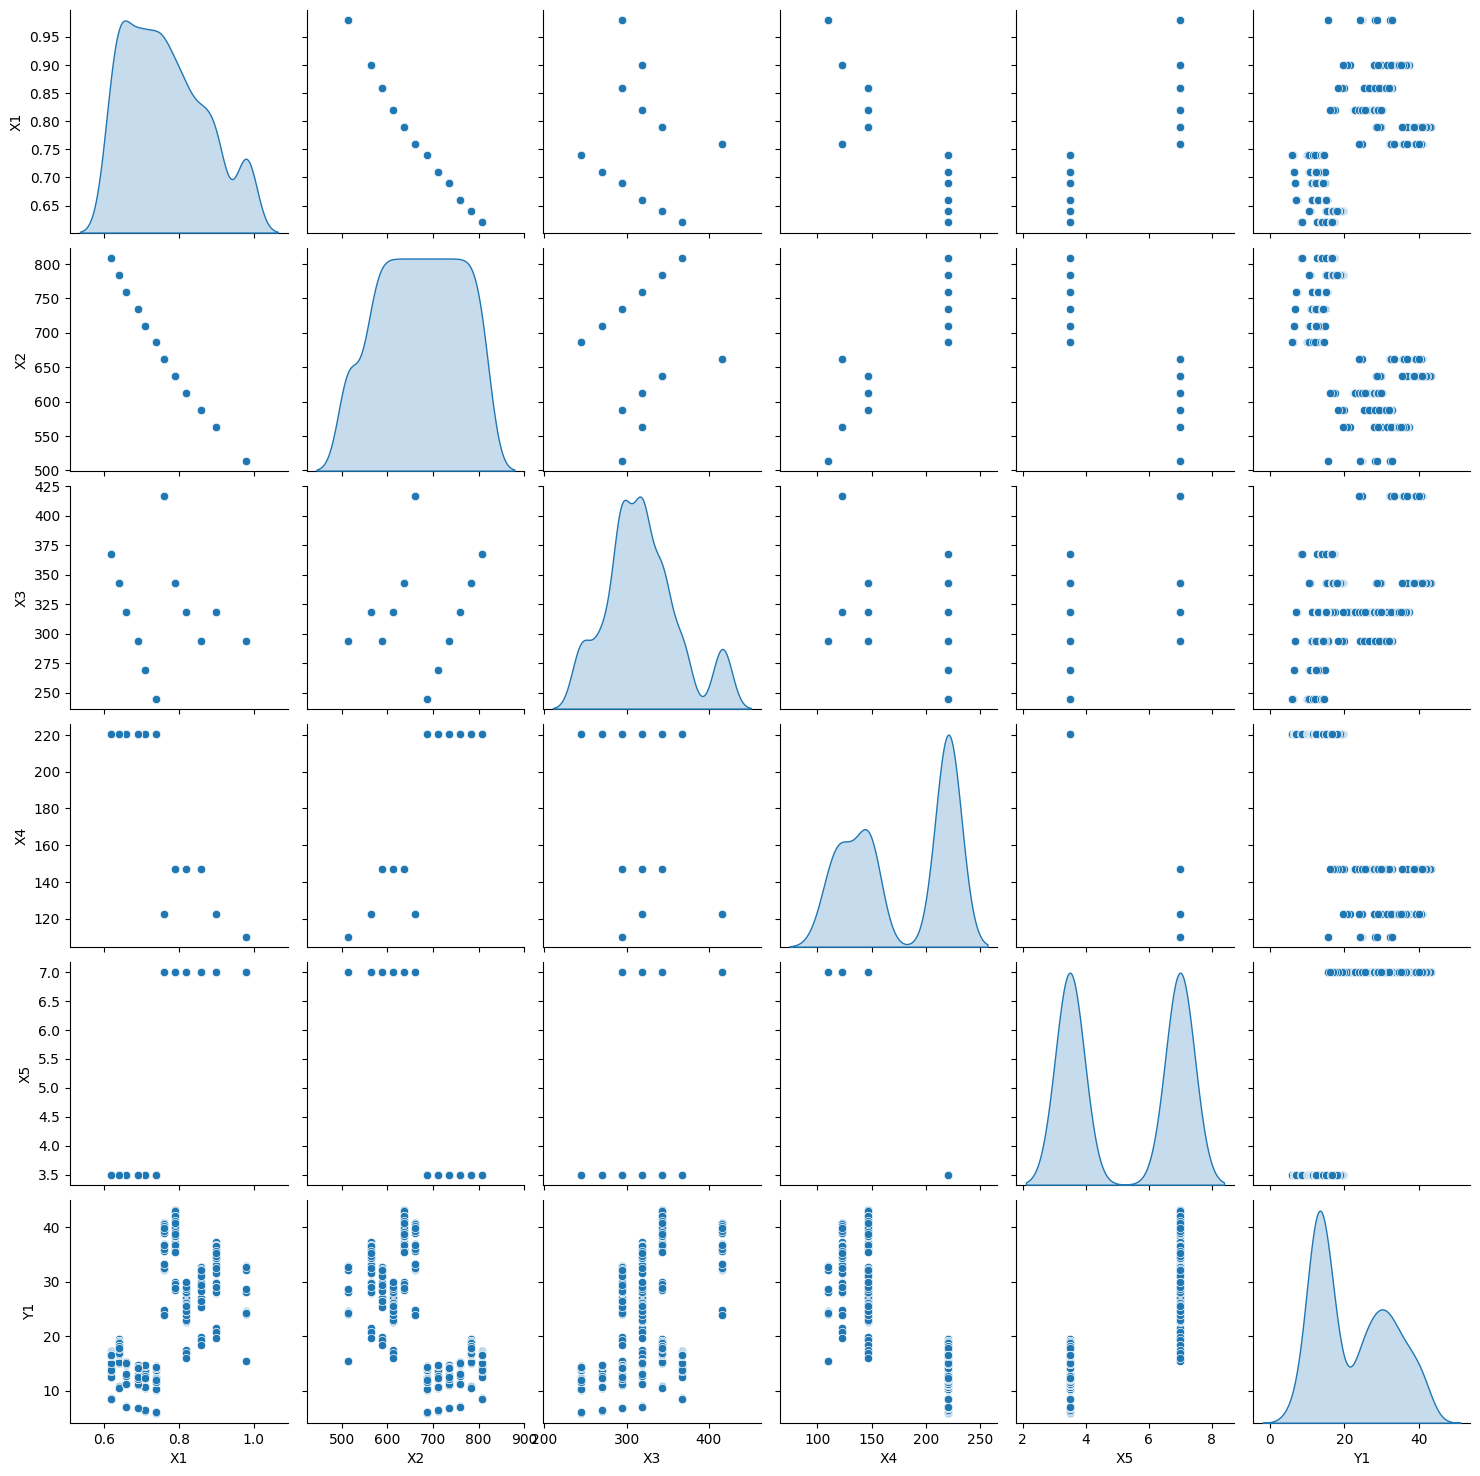

In [36]:
sns.pairplot(energy_data, diag_kind='kde')


Y = energy_data['Y1']
X = energy_data.drop(columns=['Y1']).copy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.66, random_state=1)


#### Q1. 2. Training the model & hyperparameter tuning

Max_leaf_nodes: 5	  mean_Sq_error: 14.169004230100958
Max_leaf_nodes: 10	  mean_Sq_error: 13.344286083411188
Max_leaf_nodes: 50	  mean_Sq_error: 13.347730273768516
Max_leaf_nodes: 100	  mean_Sq_error: 13.347730273768516
Max_leaf_nodes: 250	  mean_Sq_error: 13.347730273768516
Max_leaf_nodes: 500	  mean_Sq_error: 13.347730273768516
Max_leaf_nodes: 1000	  mean_Sq_error: 13.347730273768516

Least Error when max_leaf_nodes: 10
13.344286083411188


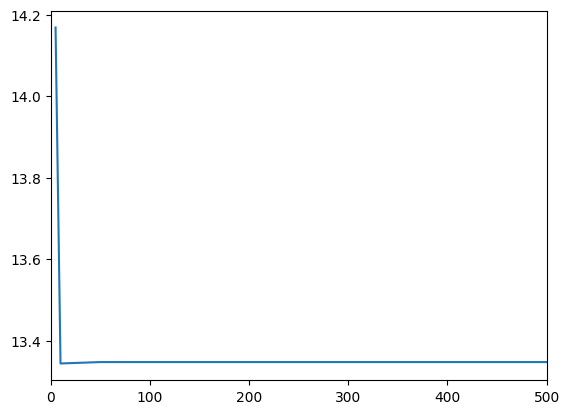

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np

n_leaves = [5, 10, 50, 100, 250, 500, 1000]
n_depth = [5, 10, 50, 100, 250, 500, 1000]

errors = []
min_error = float('inf')


def mse(no_leaves):
  decisionTreeModel = DecisionTreeRegressor(max_leaf_nodes= no_leaves, random_state=1)
  decisionTreeModel.fit(X_train, y_train)
  y_preds = decisionTreeModel.predict(X_valid)
  return mean_squared_error(y_valid, y_preds)

for i in range(len(n_leaves)):
  my_mse = mse(n_leaves[i])
  errors.append(my_mse)
  if(my_mse < min_error):
    min_error = my_mse
    optimum = n_leaves[i]
  print("Max_leaf_nodes: {}\t  mean_Sq_error: {}".format(n_leaves[i], errors[i]))

print("\nLeast Error when max_leaf_nodes: {}".format(optimum))
print(min_error)

plt.plot(np.array(n_leaves), np.array(errors))
plt.xlim(0, 500)
plt.show()


In [38]:
X_train_val = pd.concat([X_train, X_valid])
y_train_val = pd.concat([y_train, y_valid])

#### Q1. 3. Hold-out cross validation, 5-fold cross-validation and repeated-5-fold validation

In [39]:
# optimum model and holdout validation using accuracy as scoring method
my_model = DecisionTreeRegressor(max_leaf_nodes=optimum, random_state=42)
my_model.fit(X_train, y_train)
y_preds = my_model.predict(X_valid)
holdout_validation = my_model.score(X_train_val, y_train_val)
print("Holdout Validation Score: {}".format(holdout_validation))
0
#5-fold cross validation
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=5, random_state=1, shuffle=True)
k_fold_scores = cross_val_score(my_model, X_train_val, y_train_val, cv=cv)
print("5-Fold Cross Validation Score: {}".format(k_fold_scores.mean()))

#Repeated 5 fold cross validation
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
rep_k_fold_scores = cross_val_score(my_model, X_train_val, y_train_val, cv=cv)
print("Repeated 5-Fold Cross Validation Score: {}".format(rep_k_fold_scores.mean()))

y_test_preds = my_model.predict(X_test)
test_mse = mean_squared_error(y_test_preds, y_test)
print("Mean square Error on test set: {}".format(np.sqrt(test_mse)))


Holdout Validation Score: 0.9069918967945797
5-Fold Cross Validation Score: 0.9006691033522488
Repeated 5-Fold Cross Validation Score: 0.9017449885262493
Mean square Error on test set: 3.0421698951169347


##### Plotting decission tree

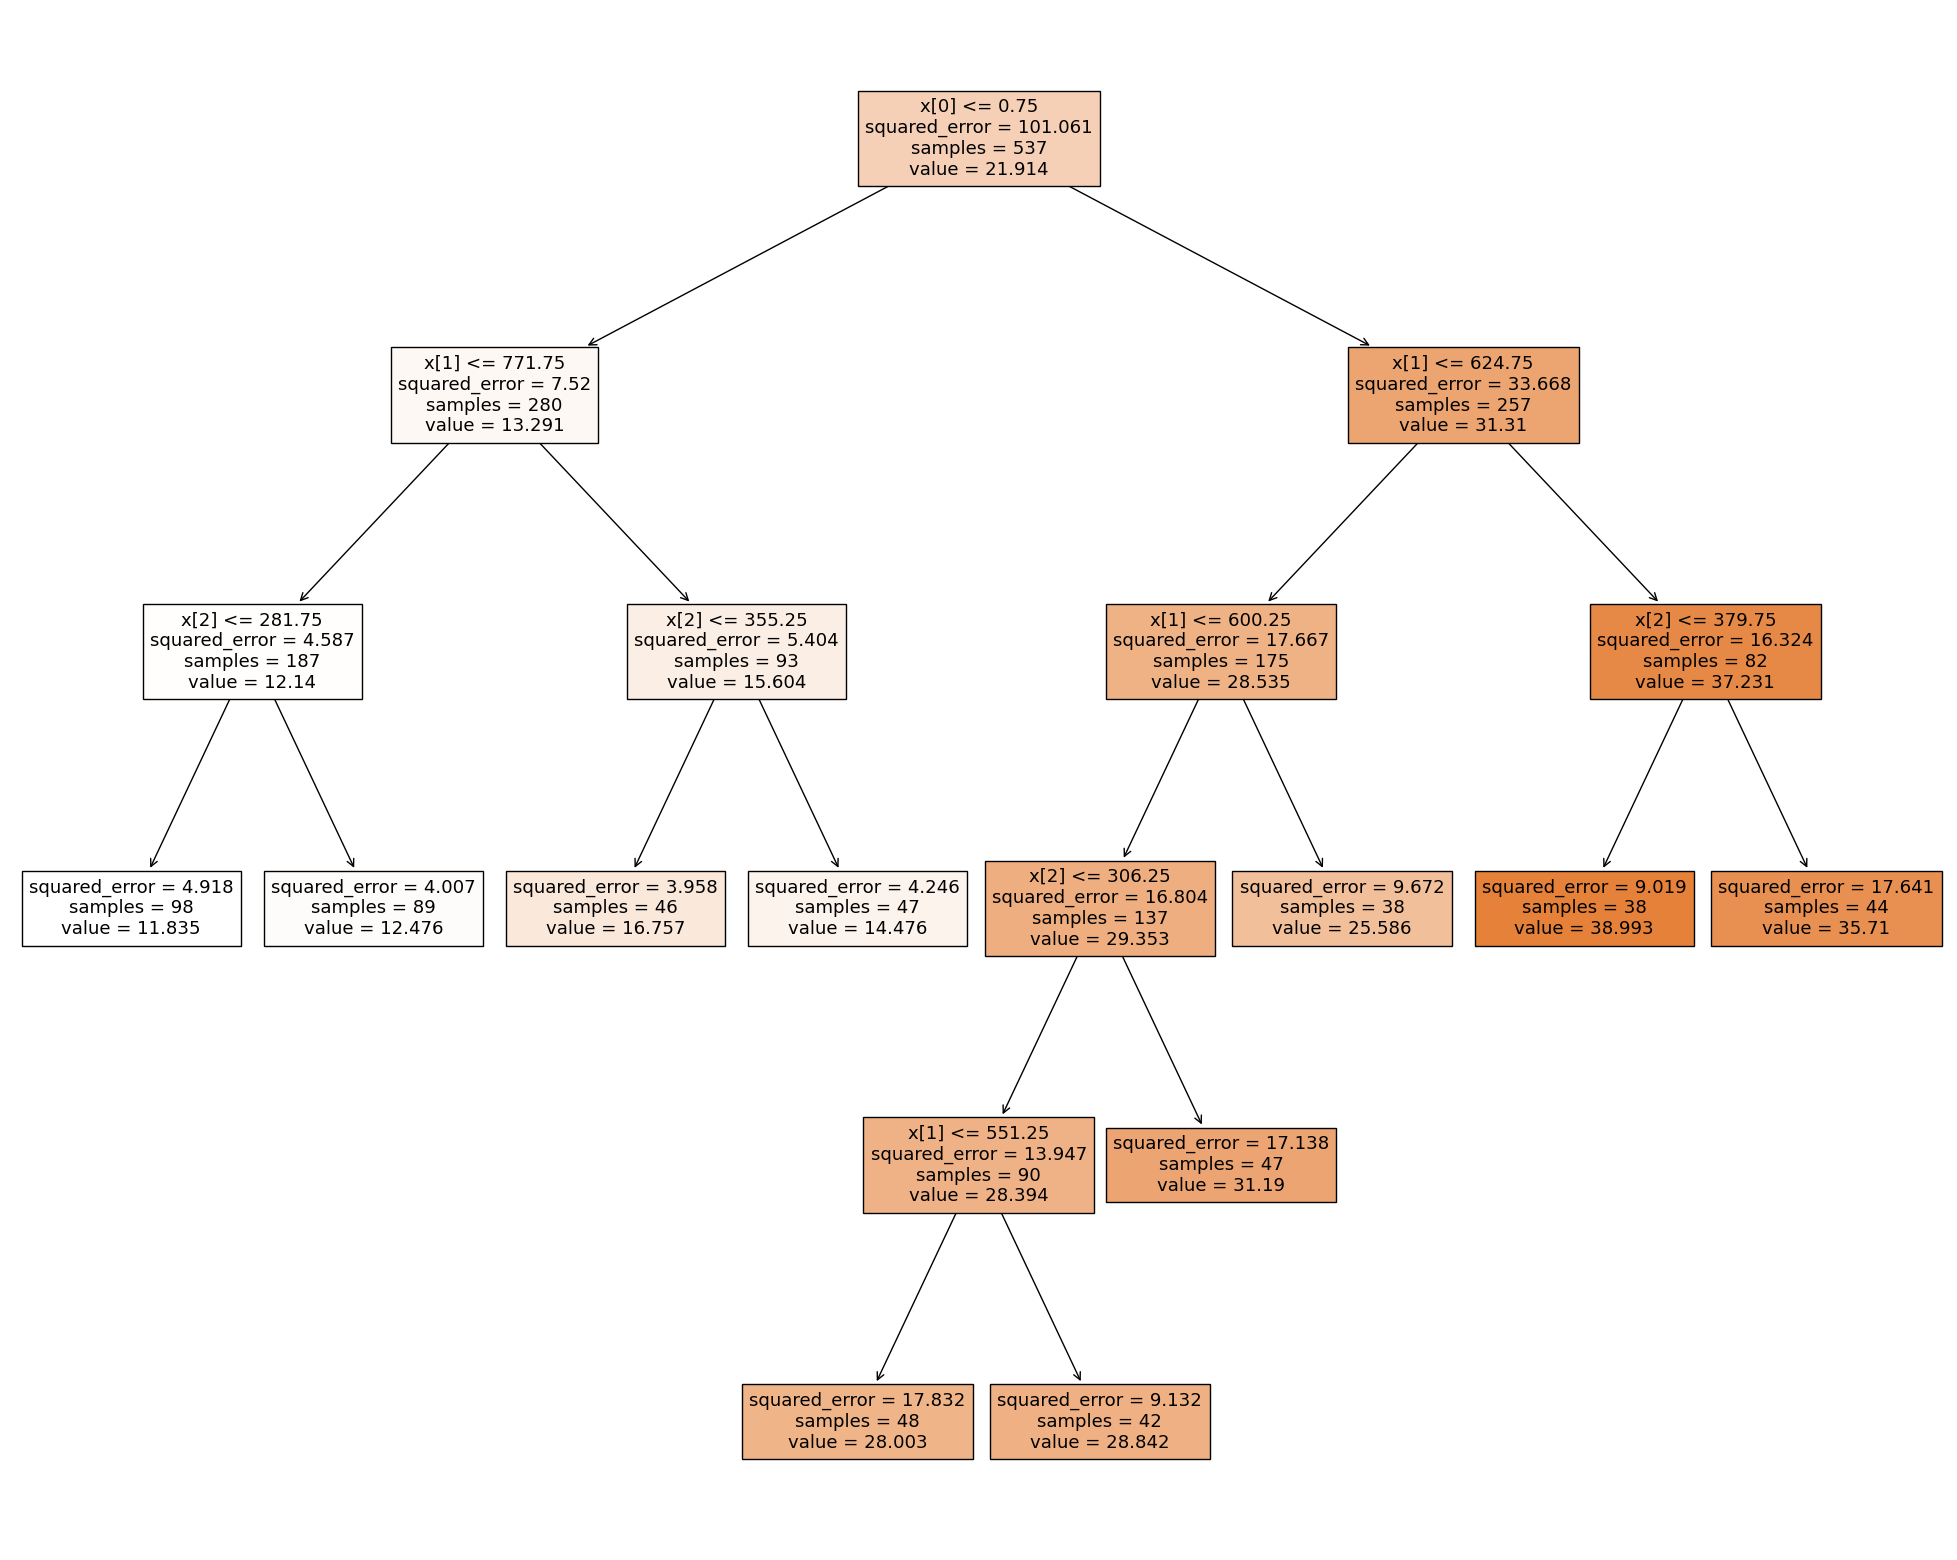

In [40]:
fig = plt.figure(figsize=(25,20))
from sklearn import tree
tree_plot = tree.plot_tree(my_model, filled=True)
plt.show()

#### Q1. 4. L1 & L2 Regularization & Decision Boundary

The RMSE with split criterion L1: 3.67837582608802
The RMSE with split criterion L2: 3.6529831759003737


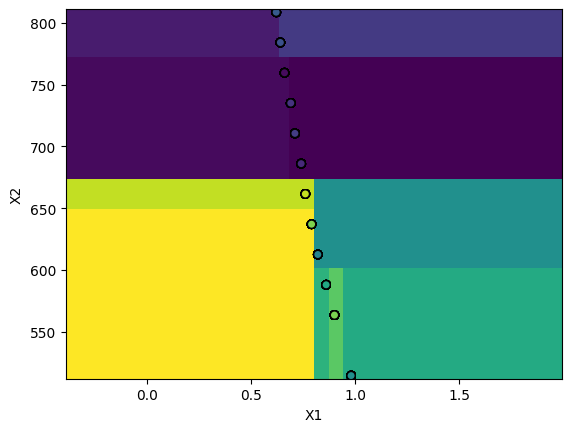

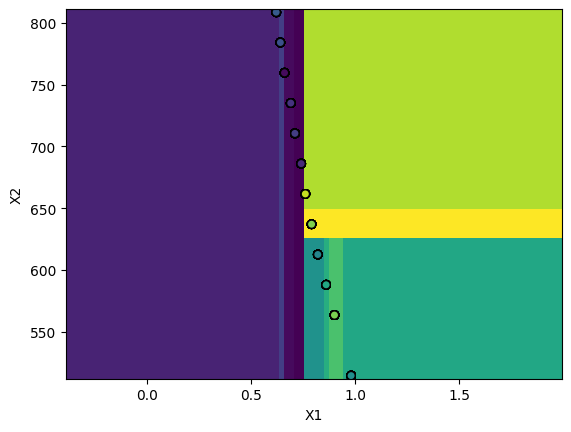

In [41]:
from sklearn.inspection import DecisionBoundaryDisplay
%matplotlib inline

def rmse(model):
  model.fit(X_train[["X1", "X2"]], y_train)
  y_preds = model.predict(X_valid[["X1", "X2"]])
  my_error = mean_squared_error(y_preds, y_valid)
  return np.sqrt(my_error)


# {‘contourf’, ‘contour’, ‘pcolormesh’}
# Absoulte Error as criterion minimises the L1 Loss
model1 = DecisionTreeRegressor(max_leaf_nodes=optimum, random_state=42, criterion="absolute_error")
print("The RMSE with split criterion L1: {}".format(rmse(model1)))

disp = DecisionBoundaryDisplay.from_estimator(model1, X_train[["X1", "X2"]], plot_method='pcolormesh')
disp.ax_.scatter(X_train["X1"], X_train["X2"], c = y_train, edgecolor = 'k')


# Squared error as criterion minimises the L2 loss 
model_2 = DecisionTreeRegressor(max_leaf_nodes=optimum, random_state=42, criterion="squared_error")
print("The RMSE with split criterion L2: {}".format(rmse(model_2)))

disp2 = DecisionBoundaryDisplay.from_estimator(model_2, X_train[["X1", "X2"]], plot_method='pcolormesh')
disp2.ax_.scatter(X_train[["X1"]], X_train[["X2"]], c = y_train, edgecolor='k')



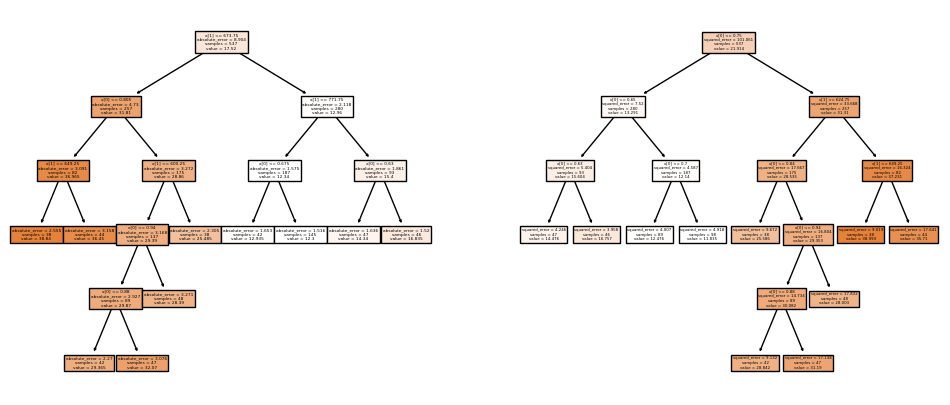

In [42]:
# plotting tree 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
tree_plot = tree.plot_tree(model1, filled=True, ax=ax1)
tree_plot_2 = tree.plot_tree(model_2, filled=True, ax=ax2)
plt.show()









### Q2. CLASSIFICATION  <BR>
 Loading the dataset

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
iris_data = pd.read_csv('./Iris.csv')

iris_data = iris_data.drop(columns=["SepalLengthCm","SepalWidthCm", "Id"], axis=1)

X_full = iris_data[["PetalLengthCm", "PetalWidthCm"]].copy()
y_full = iris_data["Species"].copy();

X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, train_size=0.8, random_state=42)


#### Q2. 1. Decision Tree Classifier

In [44]:
X_train.head()

,PetalLengthCm,PetalWidthCm
22,1.0,0.2
15,1.5,0.4
65,4.4,1.4
11,1.6,0.2
42,1.3,0.2


In [45]:
X_train.columns

Index(['PetalLengthCm', 'PetalWidthCm'], dtype='object')

/var/folders/9q/3fbzjd_j0kn9d0cvq25hhr1m0000gn/T/ipykernel_14359/1436632326.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  disp.ax_.scatter(X_train["PetalLengthCm"], X_train["PetalWidthCm"], edgecolor = 'k', cmap = "viridis")


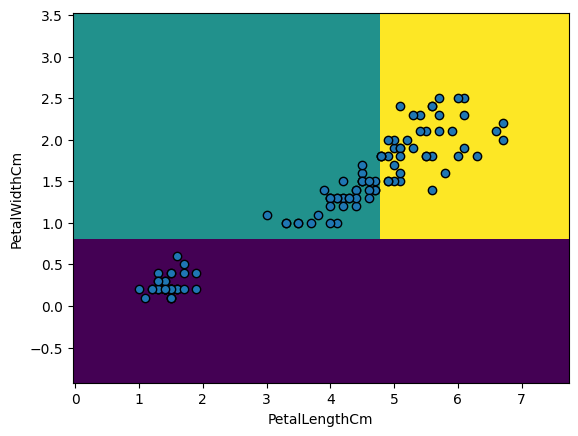

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay

decision_clf = DecisionTreeClassifier(max_depth=2, random_state=1)
decision_clf.fit(X_train, y_train)

disp = DecisionBoundaryDisplay.from_estimator(decision_clf, X_train, plot_method='pcolormesh')
disp.ax_.scatter(X_train["PetalLengthCm"], X_train["PetalWidthCm"], edgecolor = 'k', cmap = "viridis")



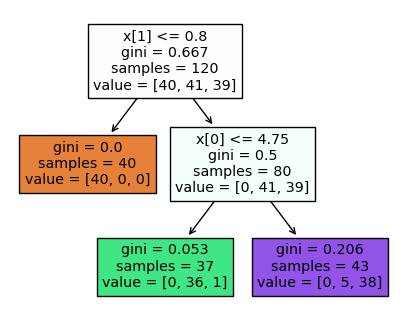

In [47]:
fig = plt.figure(figsize=(5,4))
from sklearn import tree
tree_plot = tree.plot_tree(decision_clf, filled=True)
plt.show()

#### Q2. 2. Remove the widest Iris-Versicolor

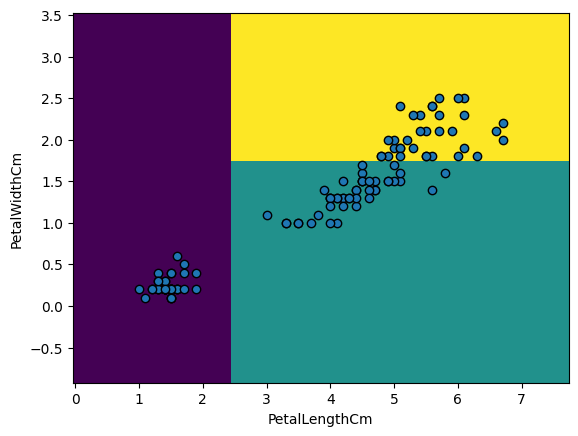

In [48]:
combined_train = pd.concat([X_train, y_train], axis=1)
# print(combined_train.head(), end="\n\n\n")

widest = combined_train[combined_train["Species"] == "Iris-versicolor"]
widest = widest.query('PetalWidthCm == PetalWidthCm.max()').index

combined_filtered = combined_train.drop(widest, inplace=True, axis=0)
# print(combined_train)
X_train_filtered = combined_train[["PetalLengthCm", "PetalWidthCm"]]
y_train_filtered = combined_train["Species"]

decision_clf_filtered = DecisionTreeClassifier(max_depth=2, random_state=42)
decision_clf_filtered.fit(X_train_filtered, y_train_filtered)

# decision boundary 
disp = DecisionBoundaryDisplay.from_estimator(decision_clf_filtered, X_train_filtered, plot_method='pcolormesh')
disp.ax_.scatter(X_train_filtered["PetalLengthCm"], X_train_filtered["PetalWidthCm"], edgecolor = 'k')





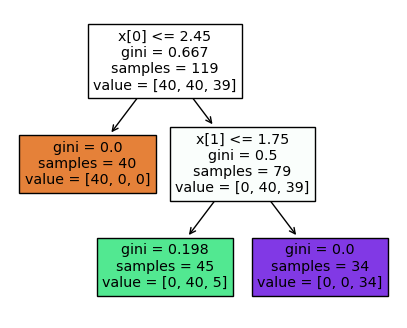

In [49]:
fig = plt.figure(figsize=(5,4))
from sklearn import tree
tree_plot = tree.plot_tree(decision_clf_filtered, filled=True)
plt.show()

#### Q2. 3. MaxDepth = None

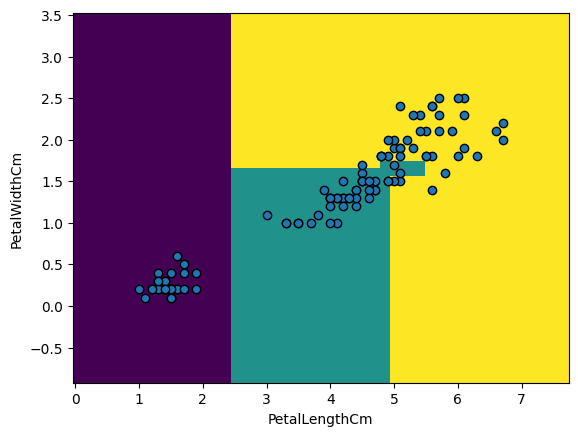

In [50]:
decision_clf = DecisionTreeClassifier(random_state=42, max_depth=None)
decision_clf.fit(X_train, y_train)
# decision boundary 
disp = DecisionBoundaryDisplay.from_estimator(decision_clf, X_train, plot_method='pcolormesh')
disp.ax_.scatter(X_train["PetalLengthCm"], X_train["PetalWidthCm"], edgecolor = 'k')


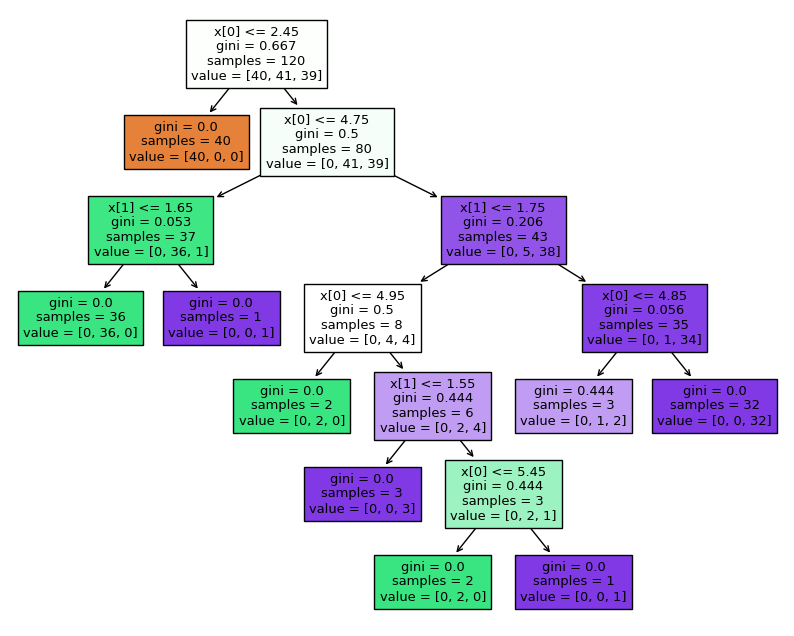

In [51]:
fig = plt.figure(figsize=(10,8))
from sklearn import tree
tree_plot = tree.plot_tree(decision_clf, filled=True)
plt.show()

#### Q2. 4 <br>
##### Creating Dataset

In [52]:
import numpy as np
import pandas as pd

a = np.round_((np.random.rand(100, 1) * 2.5), decimals=2)
b = np.round_((2.5 + (np.random.rand(100, 1) * 2.5)), decimals=2)
X1 = np.concatenate((a, b), axis=0)
np.random.shuffle(X1)

X2 = np.round_((np.random.rand(200, 1) * 5), decimals=2)
Y = np.zeros((200, 1), dtype='int')

for i in range(len(X1)):
  if(X1[i] > 2.5):
    Y[i] = 1

data = np.concatenate((X1, X2, Y), axis=1)
data = pd.DataFrame(data, columns=["X1", "X2", "Y"])

# Gives the number of samples with value 0 & 1
no_ones = len(data[data["Y"] == 1]) #equals 100
no_zeros = len(data[data["Y"] == 0]) #equals 100

X = data[["X1", "X2"]].copy()
y = data["Y"].copy()


##### Training with max_depth  =2

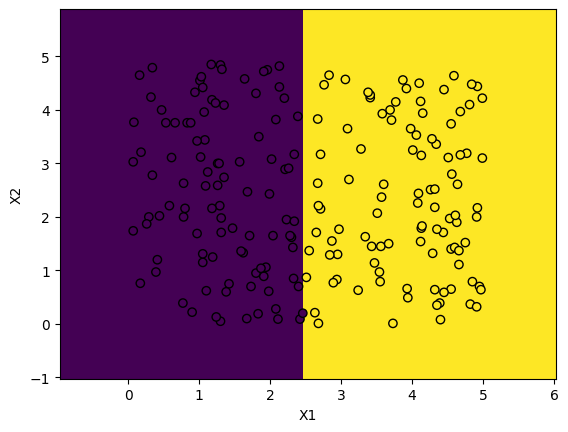

In [53]:

# #decsion boundary

my_clf = DecisionTreeClassifier(random_state=42, max_depth=2)
my_clf.fit(X, y)

disp = DecisionBoundaryDisplay.from_estimator(my_clf, X, plot_method='pcolormesh')
disp.ax_.scatter(X['X1'], X['X2'], edgecolor = 'k', c=y)


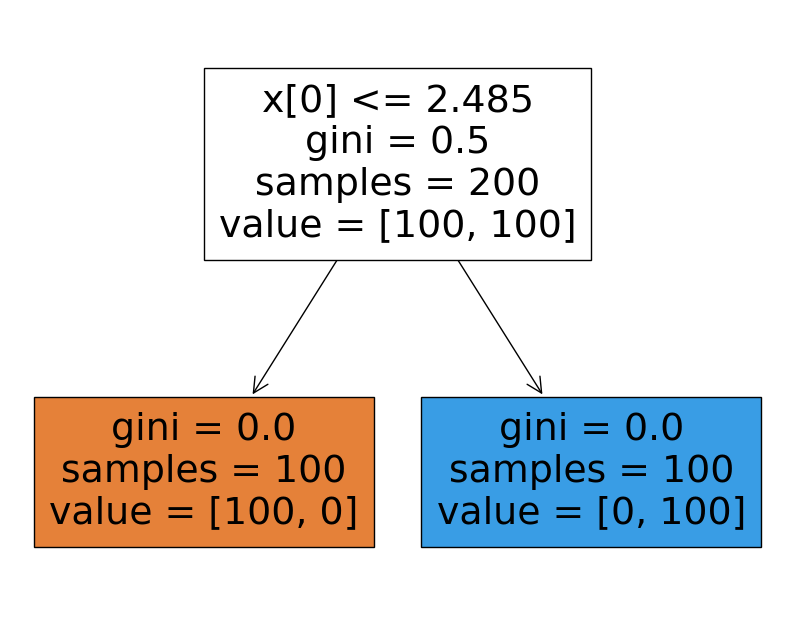

In [54]:
fig = plt.figure(figsize=(10,8))
from sklearn import tree
tree_plot = tree.plot_tree(my_clf, filled=True)
plt.show()

##### Rotation by 45 deg

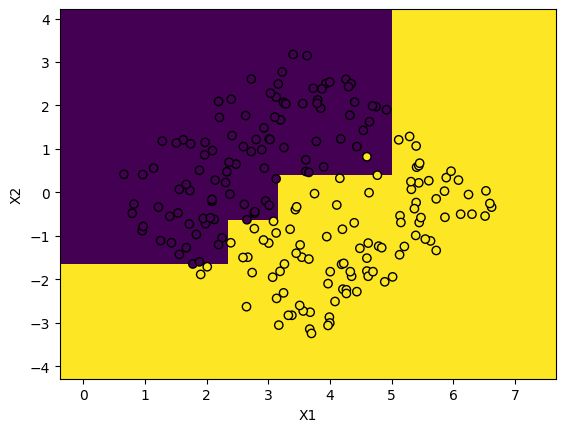

In [55]:
# rotation matrix 
theta = np.radians(45)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))

X_rotated = X.copy().to_numpy()
X_rotated = np.matmul(X_rotated, R)
X_rotated = pd.DataFrame(X_rotated, columns=['X1', 'X2'])


data_rotated = pd.concat([X_rotated, y], axis=1)
# print(data_rotated.head(), end="\n\n\n")
my_clf_2 = DecisionTreeClassifier(random_state=42)
my_clf_2.fit(X_rotated, y)

#decsion boundary
disp = DecisionBoundaryDisplay.from_estimator(my_clf_2, X_rotated, plot_method='pcolormesh')
disp.ax_.scatter(X_rotated['X1'], X_rotated['X2'], edgecolor = 'k', c=y)


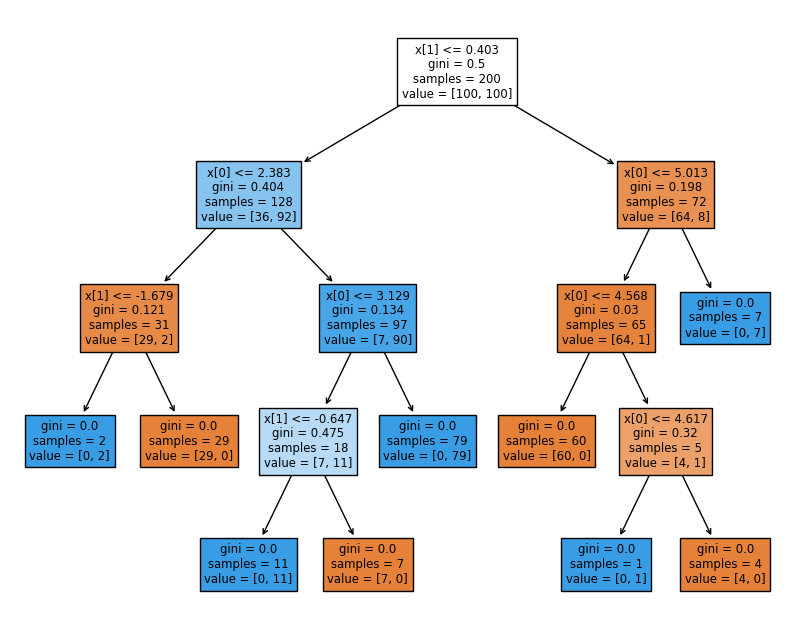

In [56]:
fig = plt.figure(figsize=(10,8))
from sklearn import tree
tree_plot = tree.plot_tree(my_clf_2, filled=True)
plt.show()

### Q2. REGRESSION <BR>
Q2. 1.


Text(0.5, 1.0, 'max_Depth = 3')

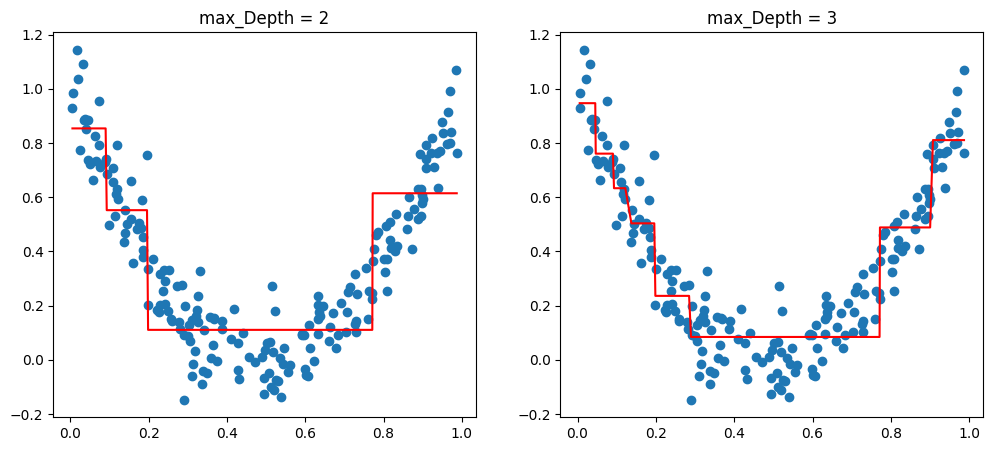

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv('./task.csv')

data = data.sort_values(by=["X"])

# print(data.head())

X = data['X']
y = data['Y']

X = X.to_frame()
y = y.to_frame()

from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=3)
regr_1.fit(X, y)
regr_2.fit(X, y)


y_preds_1 = regr_1.predict(X)
y_preds_2 = regr_2.predict(X)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
ax1.plot(X, y_preds_1, color='red')
ax1.scatter(X, y)
ax1.set_title("max_Depth = 2")

ax2.plot(X, y_preds_2, color="red")
ax2.scatter(X, y)
ax2.set_title("max_Depth = 3")




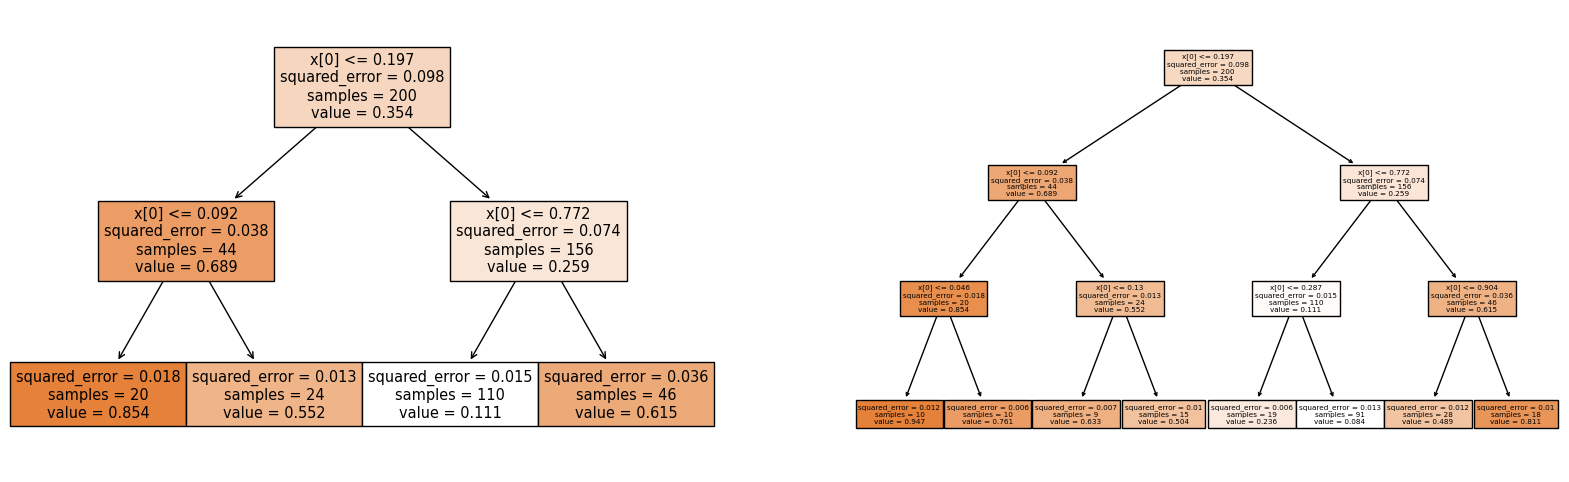

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))
tree_plot = tree.plot_tree(regr_1, filled=True, ax=ax1)
tree_plot_2 = tree.plot_tree(regr_2, filled=True, ax=ax2)
plt.show()

#### Q2. 2.

Text(0.5, 1.0, 'min_sample_leafs = 10')

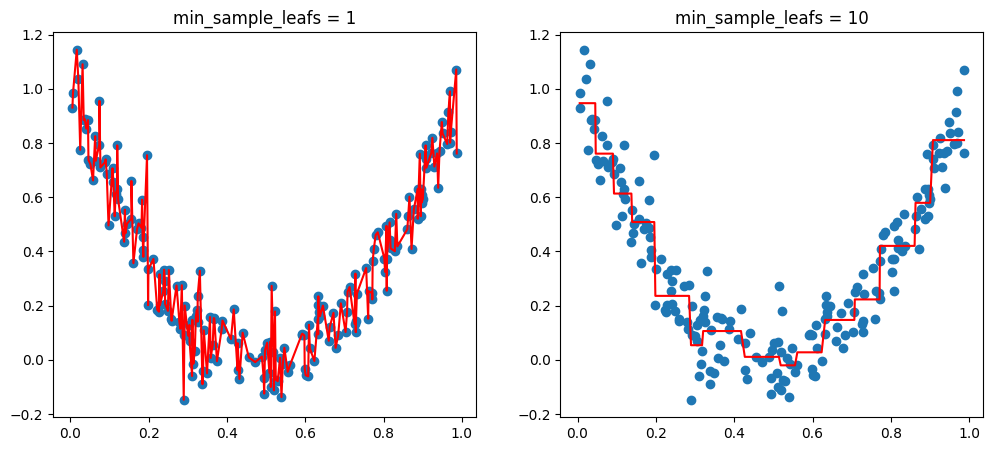

In [59]:
regr_1 = DecisionTreeRegressor(random_state=42, min_samples_leaf=1)
regr_1.fit(X, y)
regr_2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
regr_2.fit(X, y)

y_preds_1 = regr_1.predict(X)
y_preds_2 = regr_2.predict(X)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
ax1.plot(X, y_preds_1, color='red')
ax1.scatter(X, y)
ax1.set_title("min_sample_leafs = 1")

ax2.plot(X, y_preds_2, color="red")
ax2.scatter(X, y)
ax2.set_title("min_sample_leafs = 10")




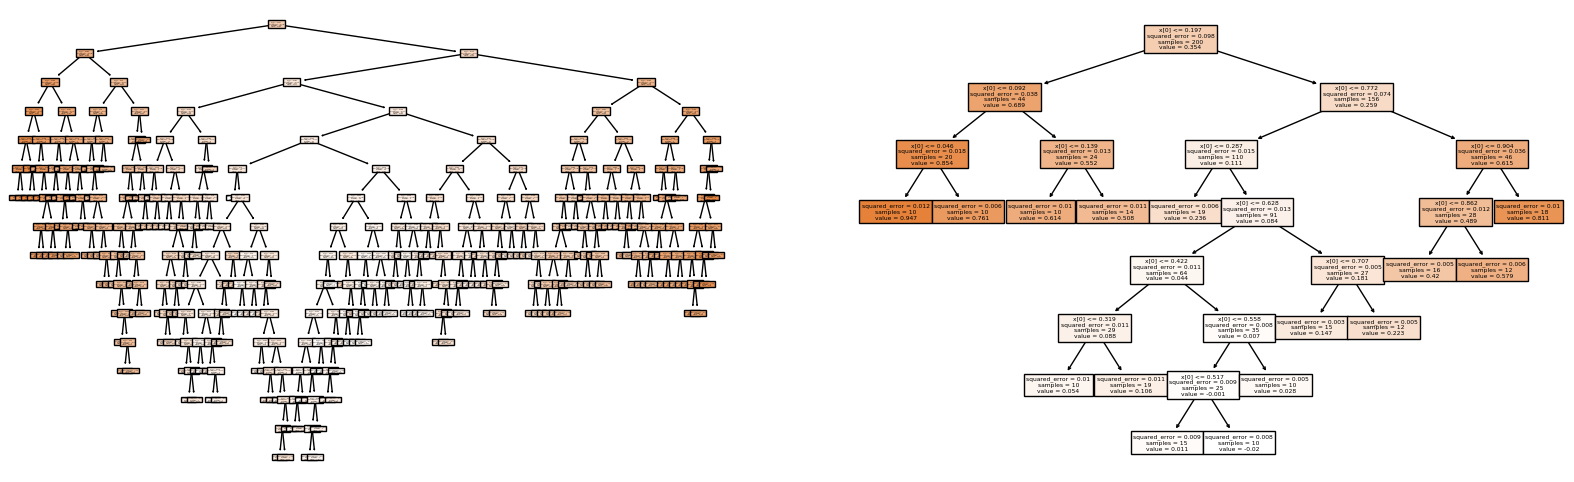

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))
tree_plot = tree.plot_tree(regr_1, filled=True, ax=ax1)
tree_plot_2 = tree.plot_tree(regr_2, filled=True, ax=ax2)
plt.show()

## Q3.

In [61]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


from palmerpenguins import load_penguins
penguins = load_penguins()
penguins.head()




,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [62]:
print(penguins.isnull().sum())

from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(strategy="most_frequent")
penguins.iloc[:, :] = my_imputer.fit_transform(penguins)


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


['species', 'island', 'sex']
[2007 2008 2009]


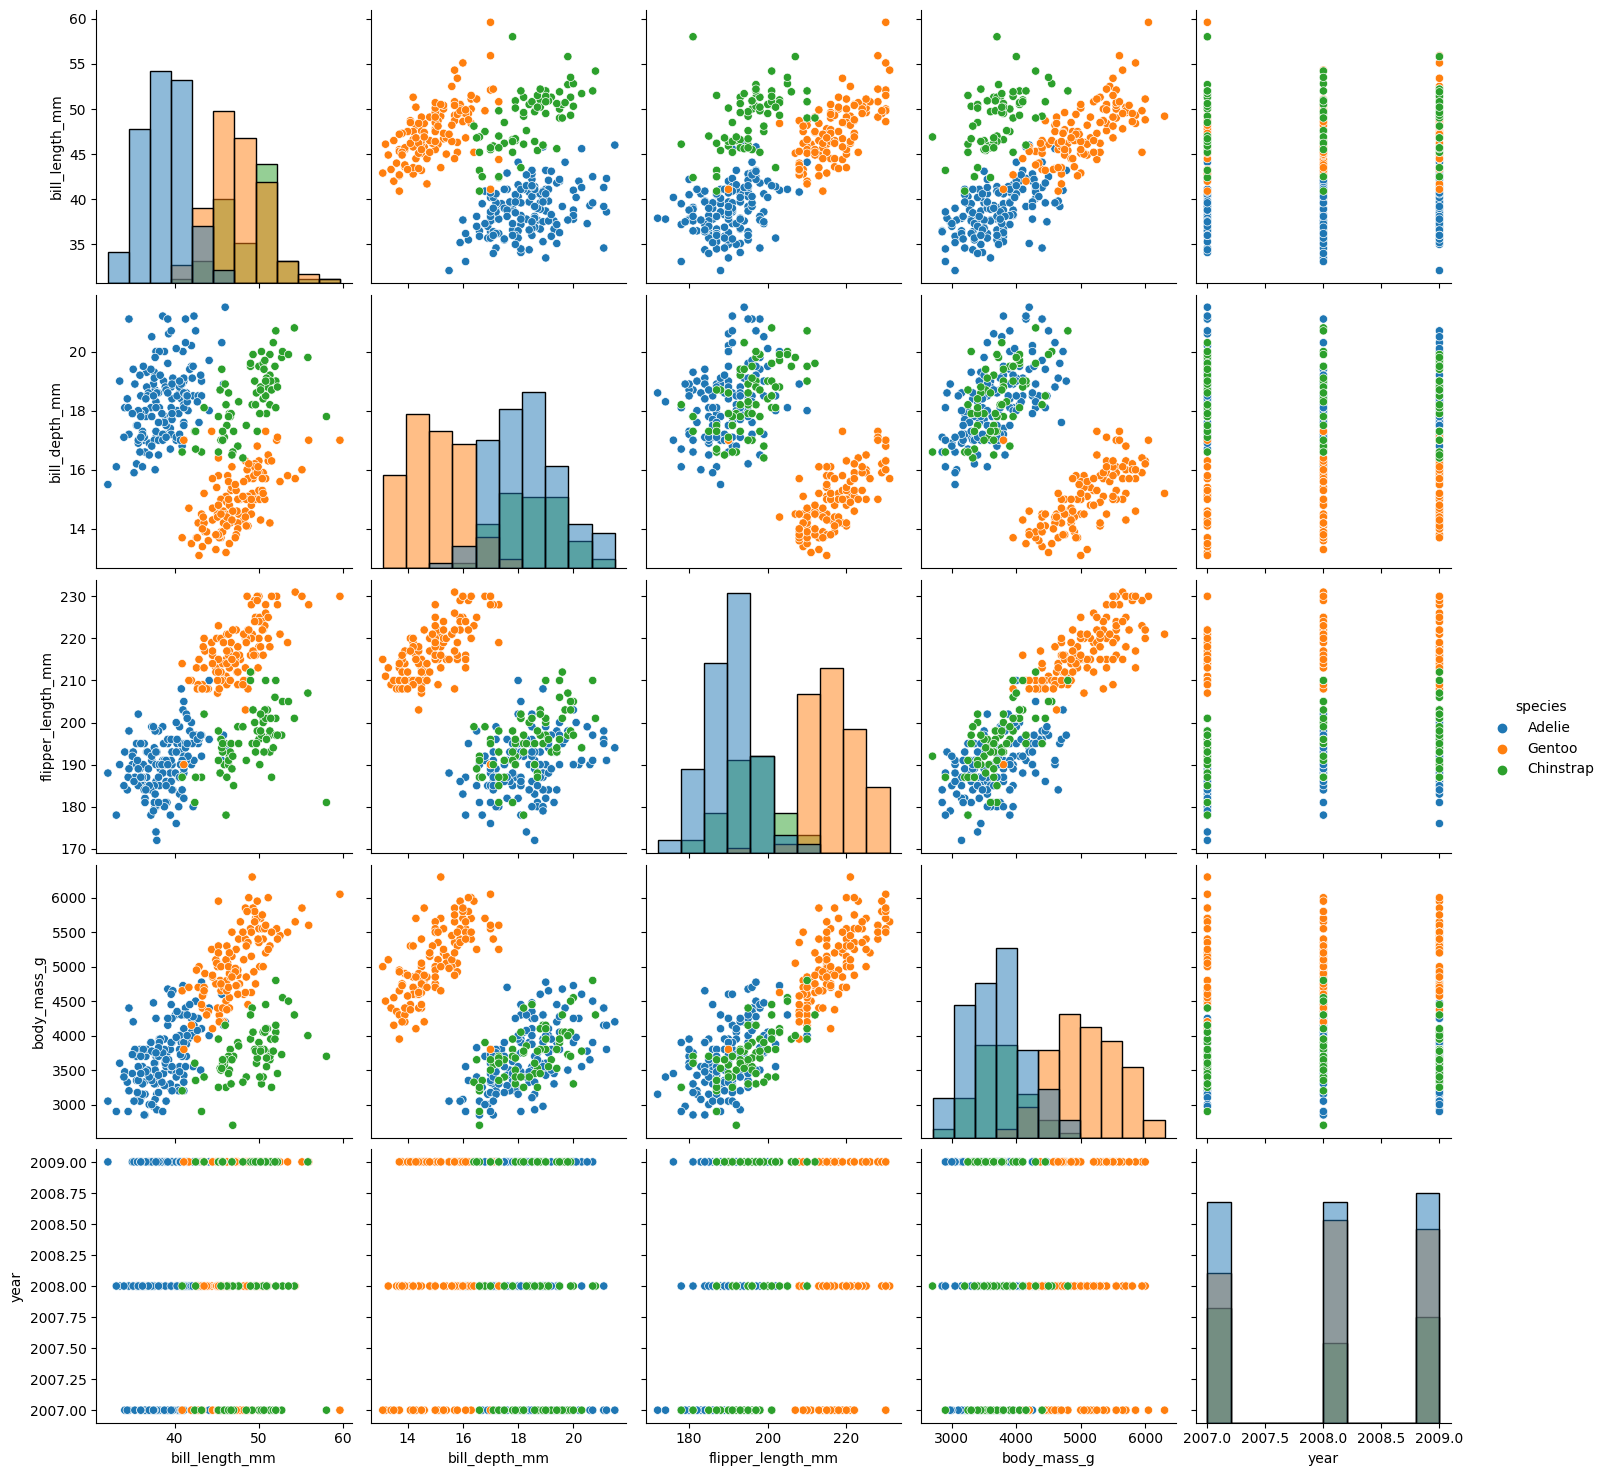

In [63]:
cat_cols = [col for col in penguins.columns if penguins[col].dtype == "object"]
print(cat_cols)

print(penguins["year"].unique())

sns.pairplot(penguins, hue="species", height=3,diag_kind="hist")


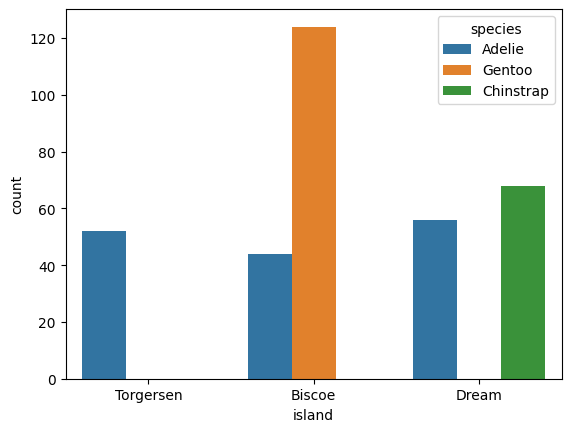

In [64]:
sns.countplot(x=penguins['island'],hue=penguins['species'])

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
penguins['island'] = enc.fit_transform(penguins['island'])
penguins['sex'] = enc.fit_transform(penguins['sex'])
penguins['species'] = enc.fit_transform(penguins['species'])


from sklearn.model_selection import train_test_split
y = penguins["species"]
X = penguins.drop(columns=["species"]).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)


In [65]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain

        self.value = value


class DecisionTreeClassifier():
    def __init__(self, max_depth=5):
        self.root = None
        self.max_depth = max_depth
        

    def build_tree(self, dataset, curr_depth=0):
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        if curr_depth<=self.max_depth:
            best_split = self.get_best_split(dataset, num_samples, num_features)

            if best_split["info_gain"]>0:
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        leaf_value = self.calculate_leaf_value(Y)
        return Node(value=leaf_value)



    def get_best_split(self, dataset, num_samples, num_features):
        best_split = {}
        best_split["feature_index"] = 0
        best_split["threshold"] = 0
        best_split["dataset_left"] = 0
        best_split["dataset_right"] = 0
        best_split["info_gain"] = 0
        max_info_gain = -float("inf")
        
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)

            for threshold in possible_thresholds:
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]

                    curr_info_gain = self.information_gain(y, left_y, right_y)
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain

        return best_split
    
    def split(self, dataset, feature_index, threshold):
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child):
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain

    def entropy(self, y):
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy

    def calculate_leaf_value(self, Y):
        Y = list(Y)
        return max(Y, key=Y.count)

    def train(self, X, Y):
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def test(self, X): 
        X = pd.DataFrame(X)
        predictions = []
        for row in X.iterrows():
            row = row[1]
            row.astype('float64')
            # self.make_prediction(row, self.root)
            predictions.append(self.make_prediction(row, self.root))
        return predictions
    
    def make_prediction(self, x, tree):    
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]

        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

    def accuracy(self, y_pred, y_test):
        y_test = y_test.to_list()
        acc = 0

        for i in range(len(y_test)):
            if(y_pred[i] == y_test[i]):
                acc+=1
        acc = acc/len(y_test)

        class_wise_acc = {}
        class_wise_cts = {}
        for i in range(len(y_test)):
            if y_test[i] in class_wise_cts:
                class_wise_cts[y_test[i]] += 1
            else:
                class_wise_cts[y_test[i]] = 1

        for key in class_wise_cts:
            class_wise_acc[key] = 0

        for cls in class_wise_cts:
            for j in range(len(y_test)):
                if(y_test[j] == cls and y_pred[j] == cls):
                    class_wise_acc[cls] += 1
        
        for cls in class_wise_acc:
            class_wise_acc[cls] = round(class_wise_acc[cls] / class_wise_cts[cls], 3)
        return acc, class_wise_acc



In [66]:
dt = DecisionTreeClassifier(max_depth=2)
y_train = pd.DataFrame(y_train)
dt.train(X_train, y_train)

y_pred = dt.test(X_test) 
acc, cw_acc = dt.accuracy(y_pred, y_test)
print("Overall Accuracy: {}\n".format(acc))
print("Classwise Accuracy: ")

for cls in cw_acc:
  print("Accuracy for class {}: {}".format(cls+1, cw_acc[cls]))

Overall Accuracy: 0.9710144927536232

Classwise Accuracy: 
Accuracy for class 1: 1.0
Accuracy for class 3: 0.923
Accuracy for class 2: 1.0
